In [7]:
import sys
import os
from pathlib import Path

import pandas as pd
import seaborn as sns

In [23]:
# Load the data
file_dir = Path.cwd().parent / 'data' / 'webis-clickbait-17' 
df = pd.read_csv(file_dir /'tweets-clean.csv', index_col=0)

In [29]:
df.shape

(19509, 11)

In [33]:
# Load the targets variables. 
import json
fpath = Path.cwd().parent / "data" / "webis-clickbait-17" / "raw-data" / "truth.jsonl"
with open(fpath) as f:
    line = f.readline()
    print(line)
    
    while line:
        dat = json.loads(line)
        tweet_ids.append(dat['id'])
        line = f.readline()
print("Number of tweets:", len(tweet_ids))

{"truthJudgments": [1.0, 1.0, 1.0, 1.0, 1.0], "truthMean": 1.0, "id": "858464162594172928", "truthClass": "clickbait", "truthMedian": 1.0, "truthMode": 1.0}

Number of tweets: 39076


In [34]:
y = pd.read_json(fpath, lines=True)

In [56]:
cols = ['score1', 'score2', 'score3', 'score4']
for i in range(len(cols)):
    y[[cols[i]]] = y[['truthJudgments']].apply(lambda x: x.truthJudgments[i],axis=1)

In [57]:
y.head()

,truthJudgments,truthMean,id,truthClass,truthMedian,truthMode,score1,score2,score3,score4
0,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,858464162594172928,clickbait,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,"[0.33333333330000003, 0.0, 0.33333333330000003...",0.133333,858462320779026432,no-clickbait,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000
2,"[0.33333333330000003, 0.6666666666000001, 1.0,...",0.400000,858460992073863168,no-clickbait,0.333333,0.000000,0.333333,0.666667,1.000000,0.000000
3,"[0.0, 0.6666666666000001, 0.0, 0.3333333333000...",0.266667,858459539296980992,no-clickbait,0.333333,0.333333,0.000000,0.666667,0.000000,0.333333
4,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,858455355948384256,no-clickbait,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [63]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools


sources_pie = go.Pie(labels=source_counts.index, values=source_counts, marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, .4], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Sources of Pie', textinfo='label+percent')

flavor_pie = go.Pie(labels=flavor_counts.index, values=flavor_counts, marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [.6, 1], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Flavors of Pie', textinfo='label+percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Pie Consumption Patterns in the United States')
fig = go.Figure(data = [sources_pie,flavor_pie ], layout = layout)


py.iplot(fig, filename='basic_pie_chart')


no-clickbait    14777
clickbait        4761
Name: truthClass, dtype: int64

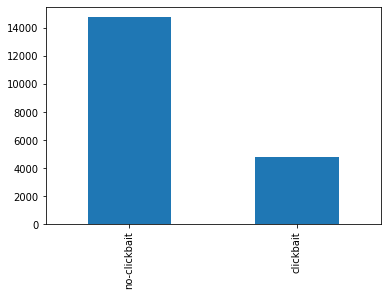

In [64]:
y['truthClass'].value_counts().plot(kind='bar');

<AxesSubplot:>

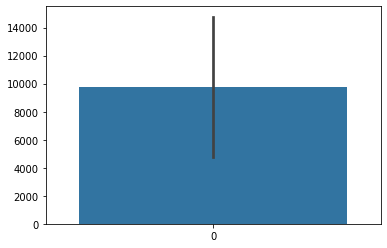

In [66]:
import seaborn as sns
sns.barplot(data=y.truthClass.value_counts())